* Check Diffusivity of the CTD casts.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime

from salishsea_tools import tidetools, viz_tools,geo_tools
import seaborn as sns
%matplotlib inline

/ocean/jieliu/Anaconda/envs/mpython2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/ocean/jieliu/Anaconda/envs/mpython2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [132]:
paths = {'RFdaily': '/data/jieliu/MEOPAR/IOS/octRFdaily/',
         '1e-05': '/data/jieliu/MEOPAR/IOS/oct1e05/',
          '1e-051e-06':'/data/jieliu/MEOPAR/IOS/oct1e061e05/'}
grid_B = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/mesh_mask.nc')

X = grid_B.variables['nav_lon']
Y = grid_B.variables['nav_lat']
bathy = grid_B.variables['Bathymetry']

In [151]:
S={}
RF_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/octRFdaily/SalishSea_1d_20141001_20141030_grid_T.nc')
Di_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_T.nc')
Vi_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_T.nc')
S['RF'] = RF_T.variables['vosaline']
S['Di'] = Di_T.variables['vosaline']
S['Vi'] = Vi_T.variables['vosaline']
depth = Di_T.variables['deptht']
time_counter = Di_T.variables['time_counter']

In [160]:
U= {}
Di_U = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_U.nc')
Vi_U = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_U.nc')
U['Di'] = Di_U.variables['vozocrtx']
U['Vi'] = Vi_U.variables['vozocrtx']

In [161]:
V= {}
Di_V = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_V.nc')
Vi_V = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_V.nc')
V['Di'] = Di_V.variables['vomecrty']
V['Vi'] = Vi_V.variables['vomecrty']

# Method 1, plot the plume boundary

In [103]:
key = 'Di'
dep = 0
S_aveN = np.nanmean(S[key][:,dep,505:510,240:245],axis = 0) ## first temporal average of northern region
S_ref = np.nanmean(S_aveN) ## then spatial average
S_thre = 1.14*S_ref-4.8 ## threshold of plume
S_aveW = np.nanmean(S[key][:,dep],axis = 0) ## temporal averaged of the whole domain

lon = Vi_T.variables['nav_lon']
lat = Vi_T.variables['nav_lat']

In [135]:
print(bathy[390:481,308])

[16.0625 12.0 10.5625 7.9375 8.3125 7.0 6.6875 4.0 4.0 4.0 4.0 4.0 4.0 4.0
 4.0 4.0 4.0 4.0 4.0 4.0 9.125 9.125 9.125 9.125 9.125 9.125 9.125 9.125
 9.125 9.125 9.125 9.125 9.125 9.125 9.125 10.125 11.125 9.125 9.125 9.125
 4.0 4.0 4.0 4.0 5.0 5.0 5.0 5.0 6.0 6.0 7.0 7.0 7.0 8.0 8.0 10.8125 16.75
 25.125 41.0 62.0 85.0 106.0 124.0 141.0 160.0 182.0 188.0 188.0 181.0
 180.0 172.0 166.0 153.0 159.0 185.0 202.0 199.0 195.0 194.0 176.0 190.0
 225.0 231.0 217.0 200.0 178.0 132.625 70.0625 44.375 -- --]


* If the plume boundary is set by the corner of viscosity case, then

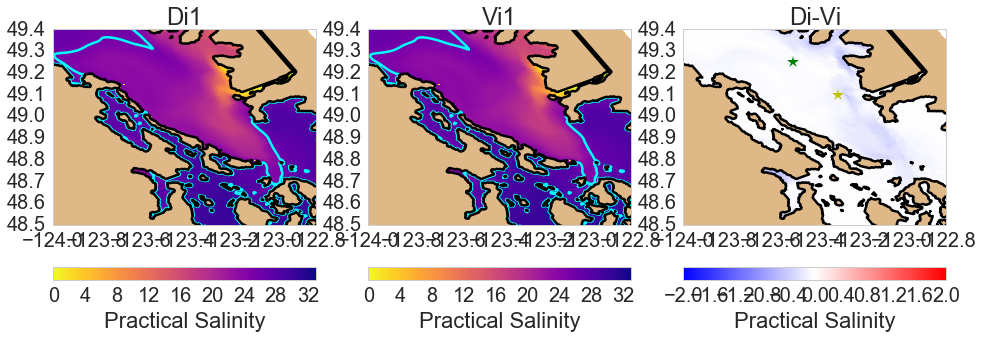

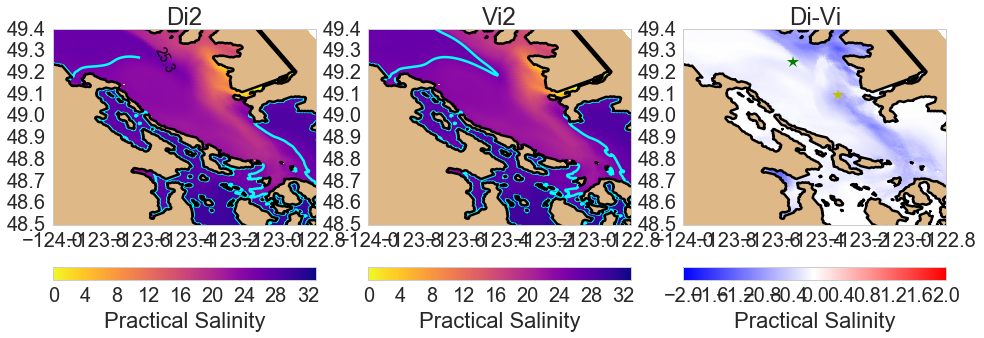

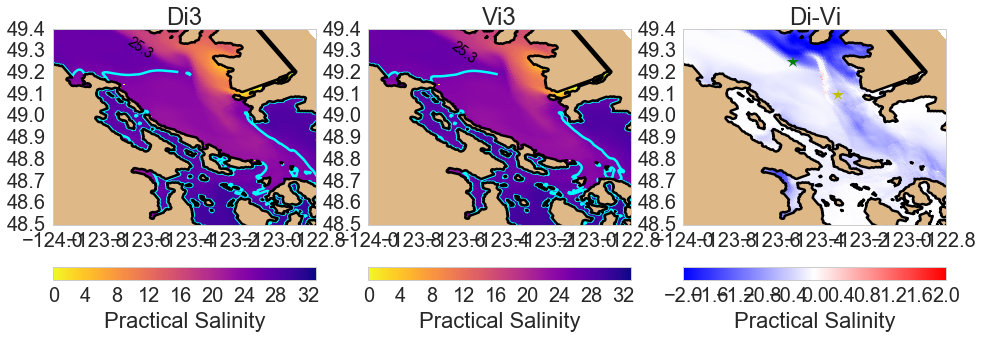

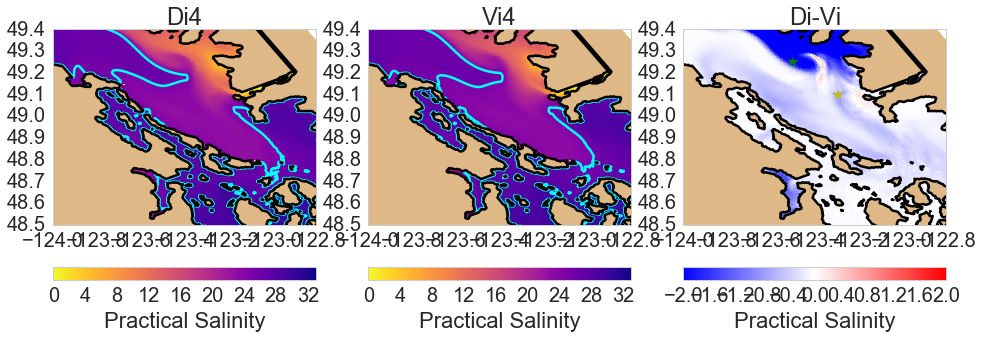

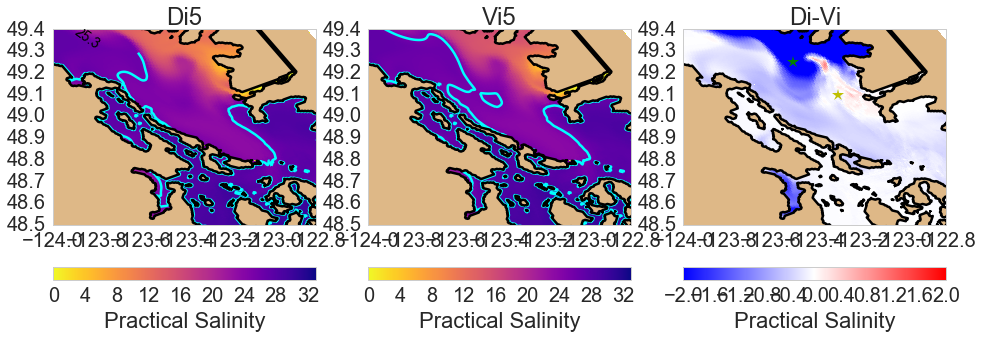

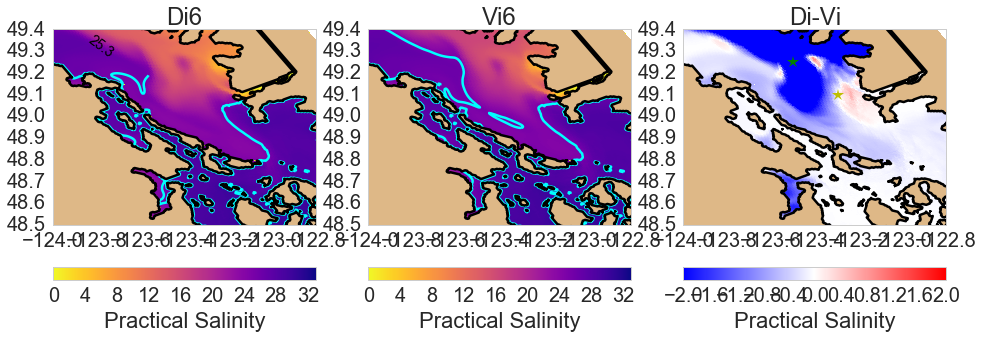

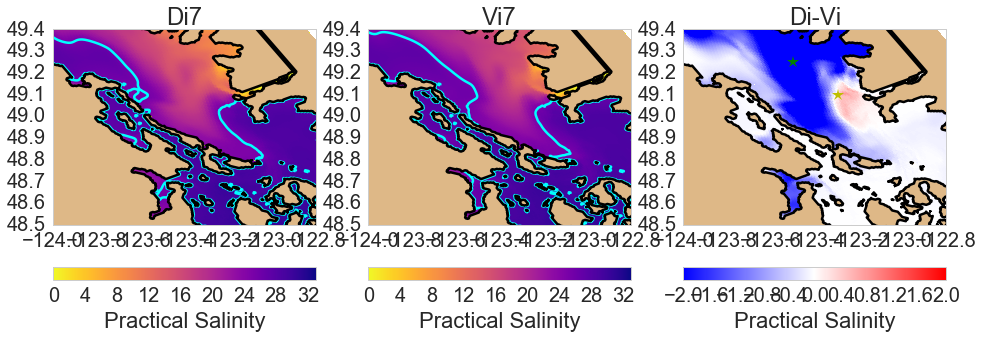

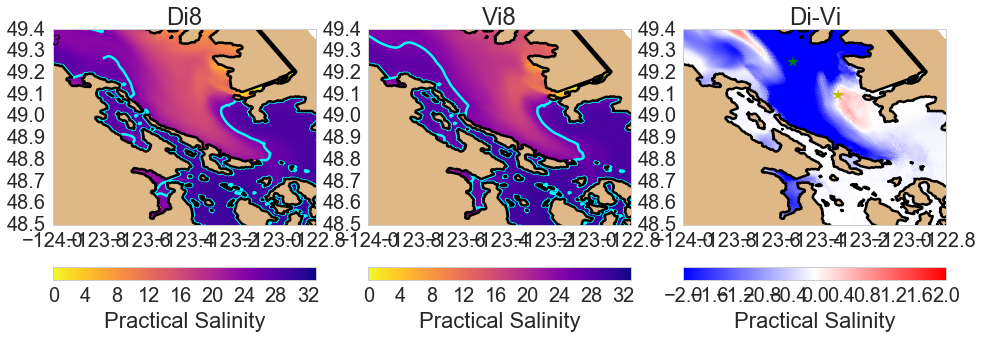

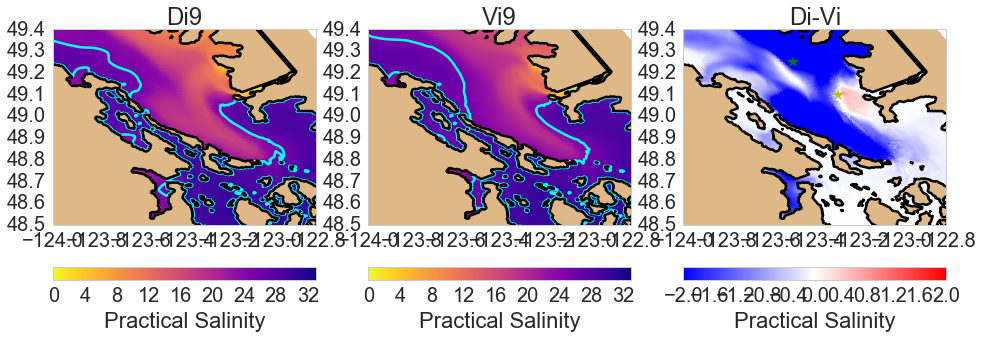

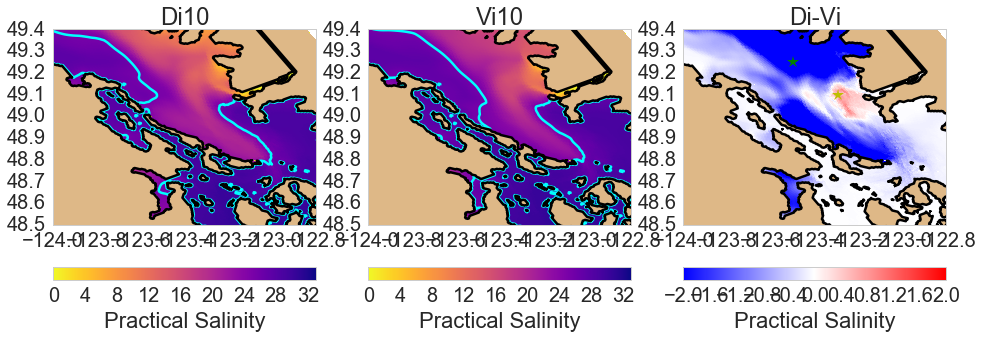

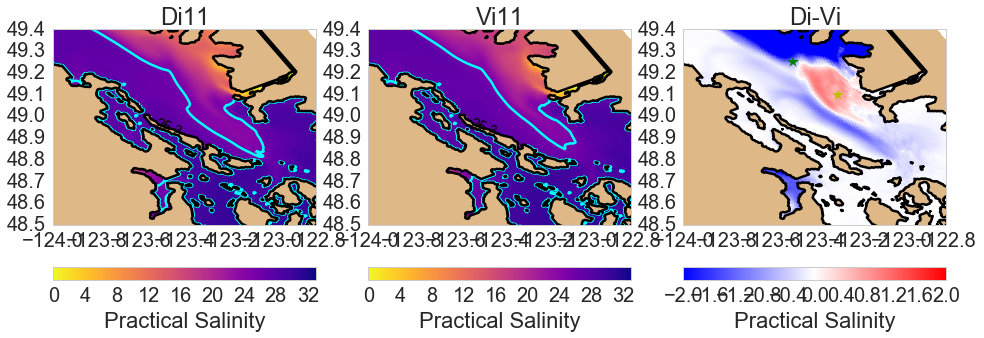

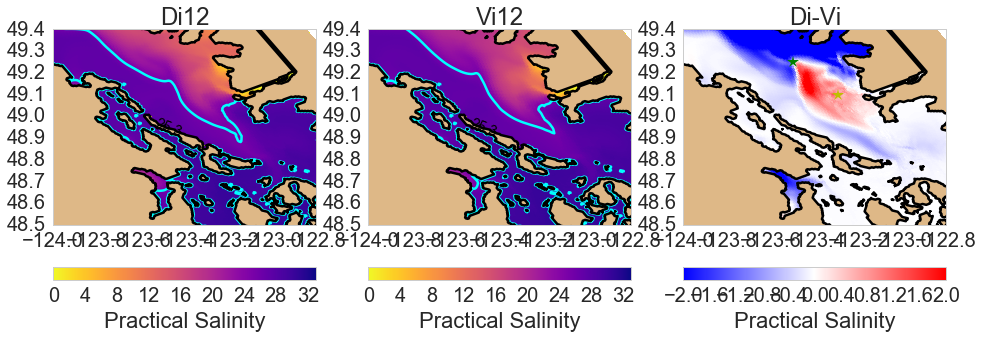

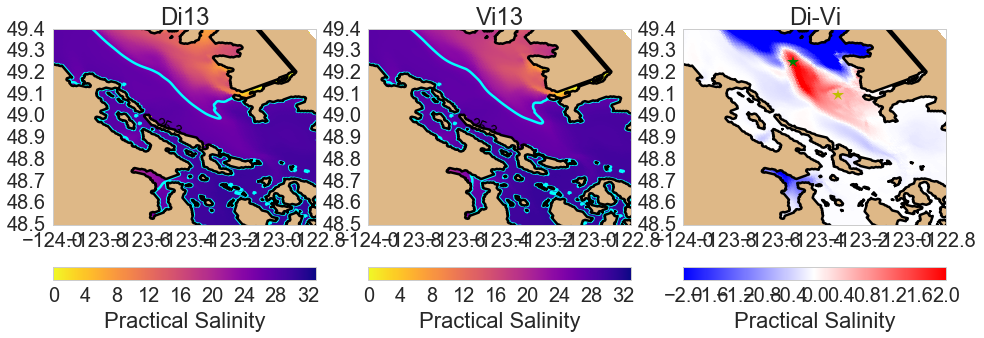

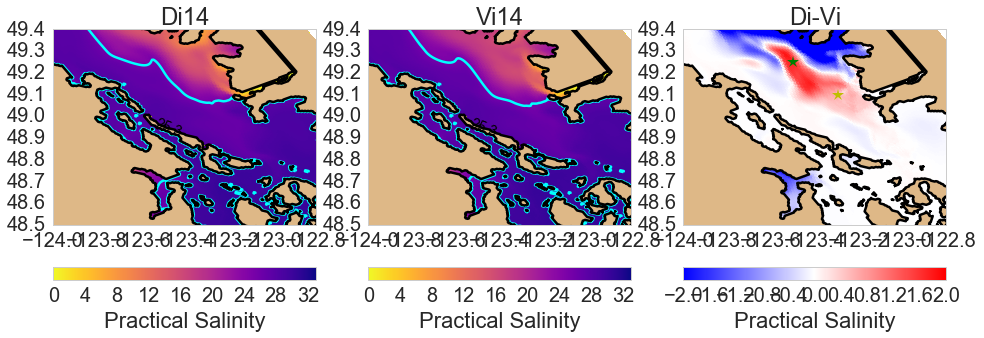

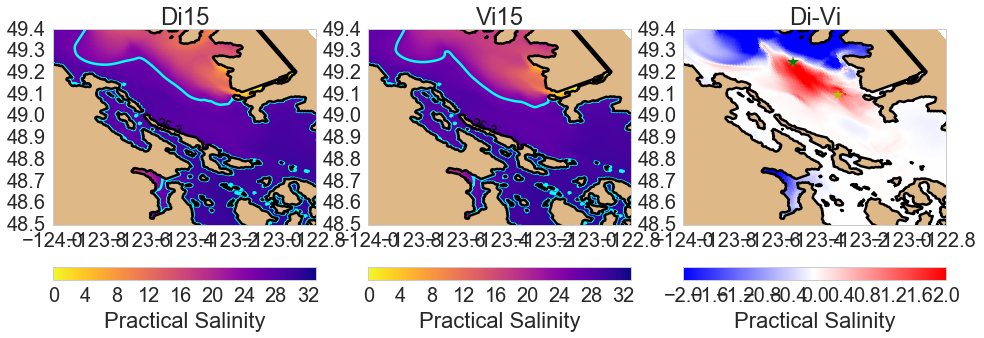

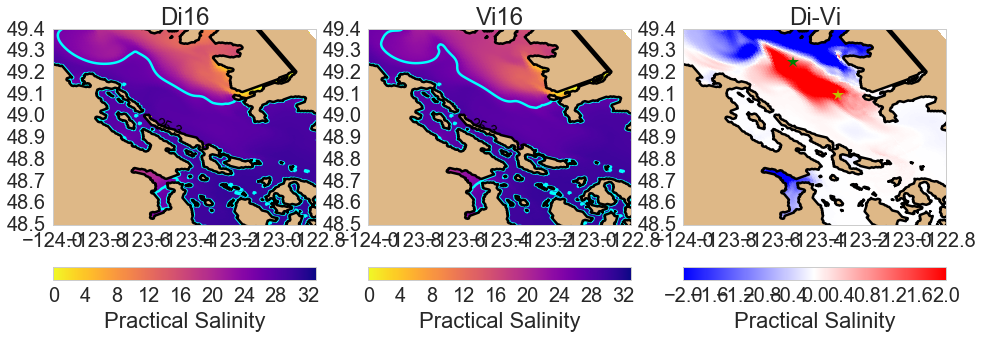

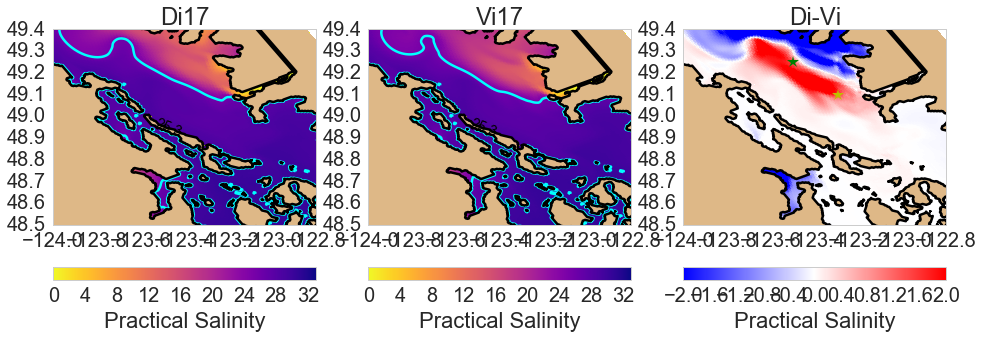

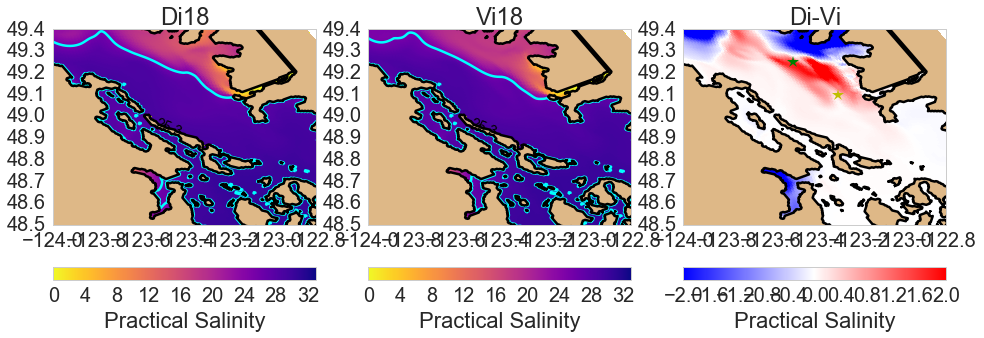

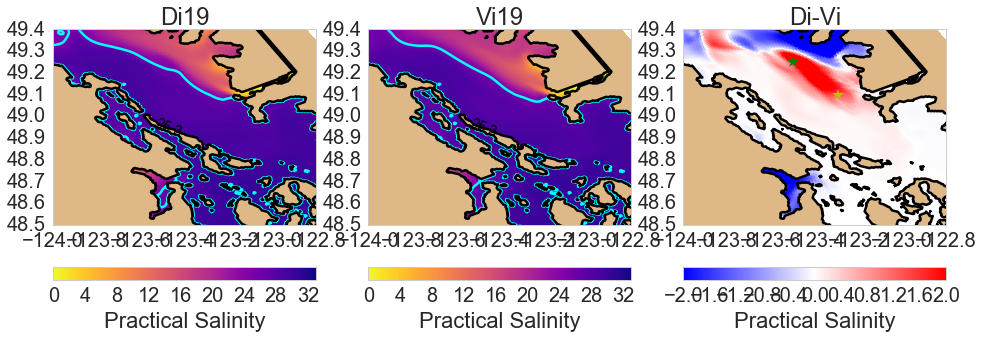

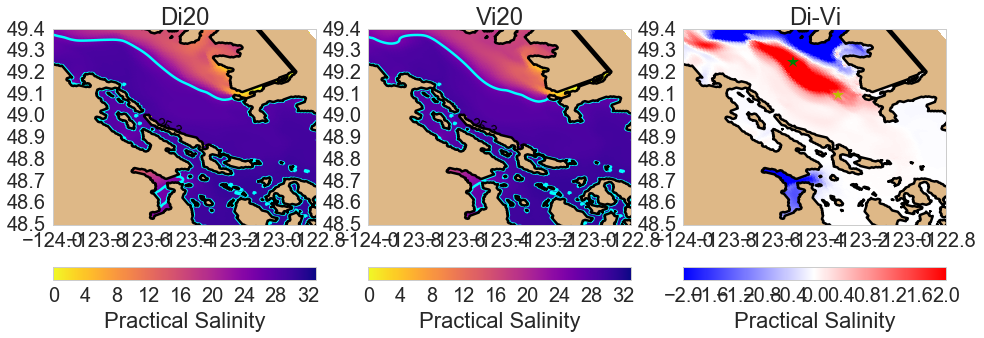

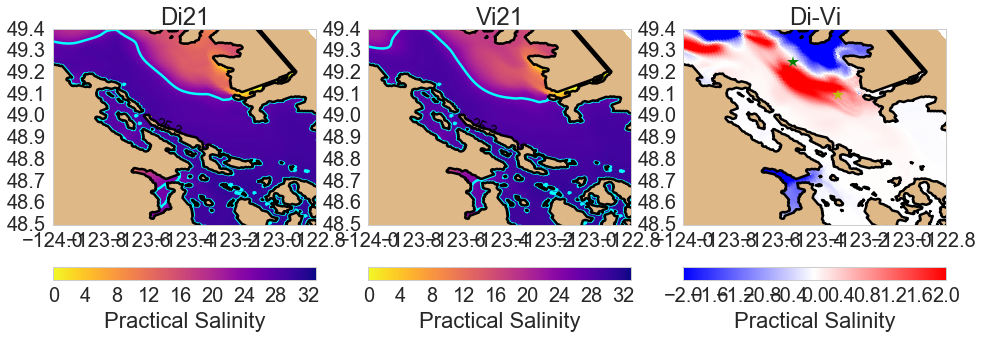

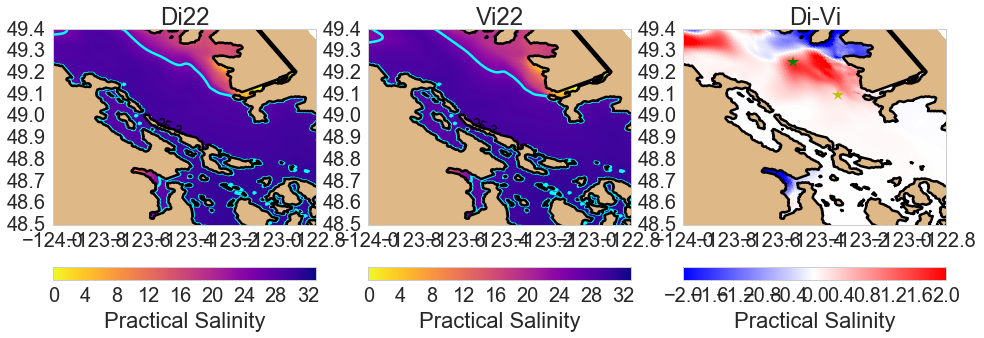

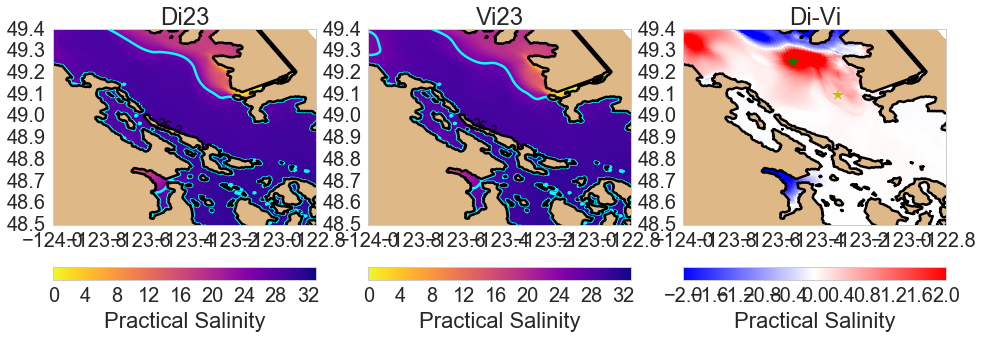

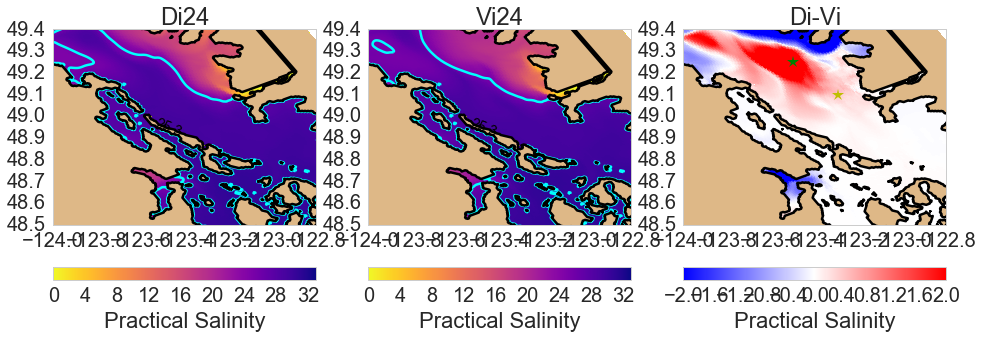

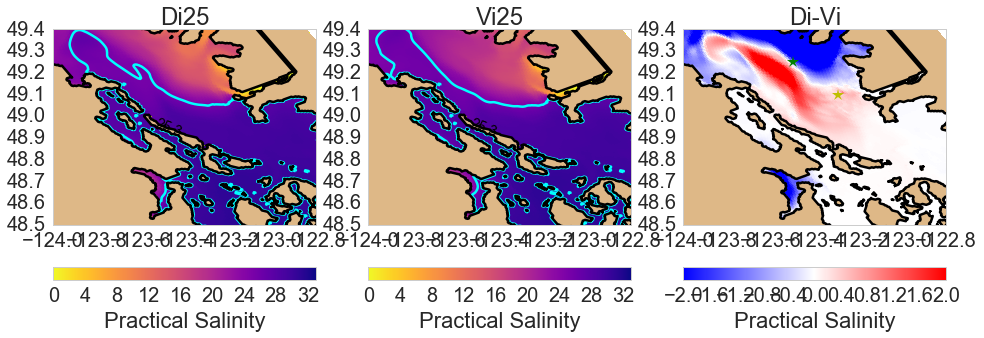

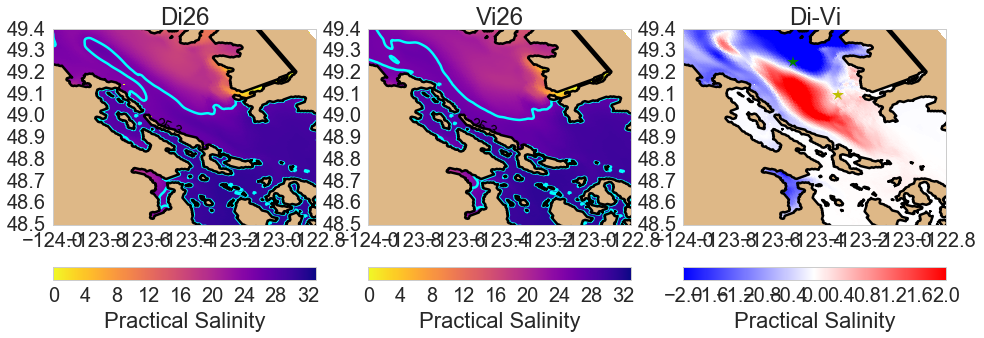

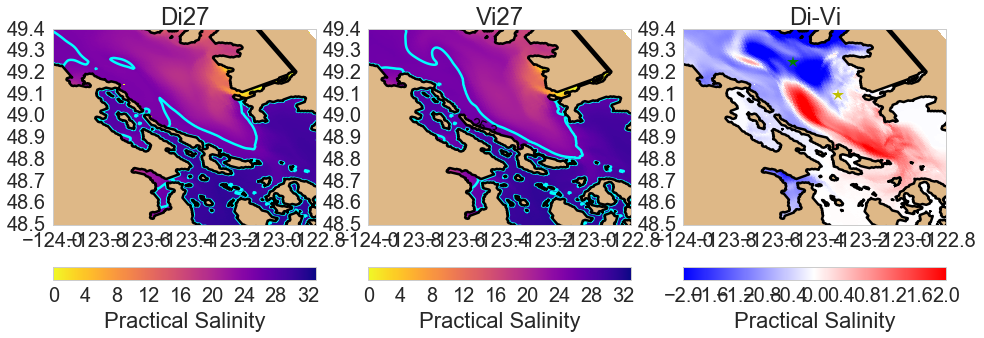

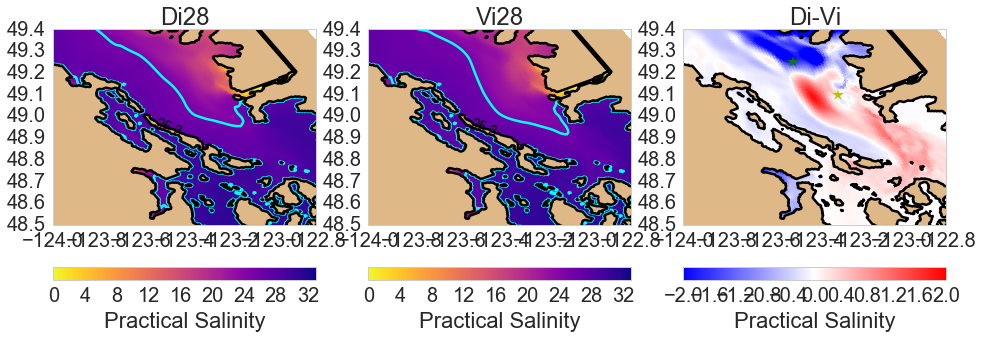

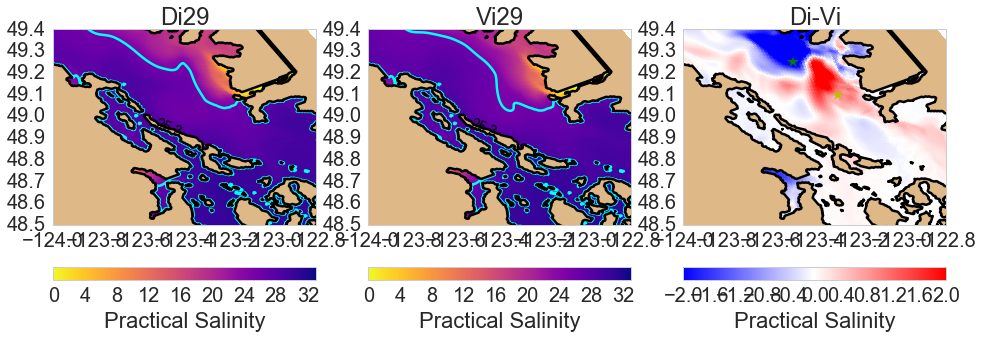

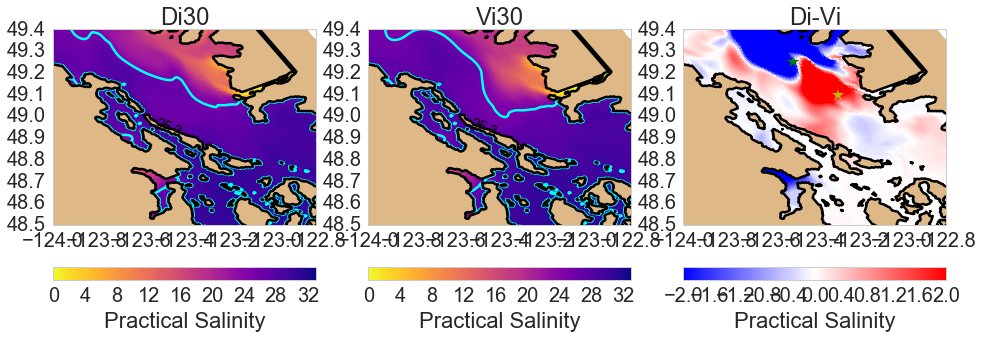

In [112]:
dep = 0
for day in range(30):
    fig,axs = plt.subplots(1,3,figsize = (16,5))
    for ax, key in zip([axs[0],axs[1]],['Di','Vi']):
        mesh = ax.pcolormesh(X,Y,S[key][day,dep],label = key,cmap = 'plasma_r',vmin =0,vmax = 33)
        CS3 = ax.contour(lon[:],lat[:],S[key][day,dep], levels = [S_thre], colors='cyan',linewidths=(2.5))
        plt.clabel(CS3, fmt='%2.1f',inline=1,inline_spacing=-2,colors='k',fontsize = 14)
        viz_tools.plot_coastline(ax,grid_B, coords='map')
        viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
        cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
        cbar.set_label('Practical Salinity')
        ax.set_title(key+str(day+1))
        ax.set_xlim([-124, -122.8])
        ax.set_ylim([48.5, 49.4]) 

    ax = axs[-1]
    mesh = ax.pcolormesh(X,Y,S['Di'][day,dep]-S['Vi'][day,dep],label = key,cmap = 'bwr',vmin =-2,vmax = 2)
    ax.plot(X[426,293],Y[426,293],'y*',markersize = 12)
    ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
    cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
    cbar.set_label('Practical Salinity')
    ax.set_title('Di-Vi')
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4])  

# Method 2: Calculate surface freshwater amount in a closed box

In [138]:
transects = {'1':{'jst':480, 'ist':260,'jen':481,'ien':311}, ## cross-strait transect
            '2':{'jst':390, 'ist':260,'jen':391,'ien':311},
            '3':{'jst':390, 'ist':260,'jen':481,'ien':261},  ## along-strait transect
            '4':{'jst':390, 'ist':310,'jen':481,'ien':311}}

(48.5, 49.4)

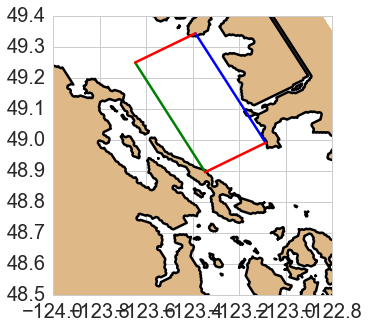

In [137]:
fig, ax = plt.subplots(1,1,figsize = (16/3,5))
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[390:481,310],Y[390:481,310],'b-')
ax.plot(X[390:481,260],Y[390:481,260],'g-')
ax.plot(X[390,260:311],Y[390,260:311],'r-')
ax.plot(X[480,260:311],Y[480,260:311],'r-')
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.4])  

In [189]:
tmask = mesh.variables['tmask'][:]
np_mask = np.abs(1-tmask) 

In [176]:
def transport_calculate(S,U,V,lon,lat,depth,tran,t_st,t_en,S0,fresh_flag = 'fresh'):
    """Same as transport_calculate function, but focus on a continous time period rather 
    than a specific time, including fresh water flux 'fresh' flag,
    salt flux 'salt' flag, and total flux 'None' flag"""
    SS={};UU={};VV={}
    jinds = np.arange(transects[tran]['jst']-1,transects[tran]['jen'])
    iinds = np.arange(transects[tran]['ist']-1,transects[tran]['ien'])
    for pa in paths:
        SS[pa] = np.zeros([time_counter.shape[0],depth.shape[0],jinds.shape[0],iinds.shape[0]])
        UU[pa] = np.zeros([time_counter.shape[0],depth.shape[0],jinds.shape[0]-1,iinds.shape[0]-1])
        VV[pa] = np.zeros([time_counter.shape[0],depth.shape[0],jinds.shape[0]-1,iinds.shape[0]-1])
        for t in np.arange(t_st,t_en+1):
            SS[pa][t] = S[pa][t,:,jinds,iinds]    
            mask_=np_mask[:,:,jinds[0]:jinds[-1]+1,iinds[0]:iinds[-1]+1]
            SS[pa][t] = np.ma.masked_array(SS[pa][t],mask=mask_) ## mask sal=0 by tmask 
            UU[pa][t],VV[pa][t] = viz_tools.unstagger(U[pa][t,:,jinds,iinds],\
                                          V[pa][t,:,jinds,iinds])

    trans,trans_sur,trans_to= transport_time(SS,UU,VV,lon,lat,depth,tran,t_st,t_en,\
                                                S0,fresh_flag = fresh_flag) ## get surface/total transport
        ## location
    return trans,trans_sur,trans_to

In [209]:
def transport_time(S,U,V,lon,lat,depth,tran,t_st,t_en,S0,fresh_flag = 'fresh'):
    """This function was made to calculate total 
    transport/fresh water transport during a continuous 
    period, rather than the specific time 
    fresh_flag = 'fresh', fresh flux; 'salt',salt flux; 'None', total flux"""
    trans = {}; trans_surf = {}; trans_total ={}
    if tran =='3' or tran =='4': ## cross-shelf transport
        for pa in paths:
            trans[pa] = np.zeros([time_counter.shape[0],depth.shape[0],np.arange(transects[tran]['jen']-transects[tran]['jst']).shape[0]])
            for t in np.arange(t_st,t_en+1):
                for z in np.arange(depth.shape[0]):
                    for j in np.arange(transects[tran]['jen']-transects[tran]['jst']):
                        if fresh_flag == 'None':
                            ratio = 1
                        elif fresh_flag =='fresh':
                            ratio = (S0 - S[pa][t][z,j+1,1])/S0
                            trans[pa][t,z,j] = ratio* U[pa][t,z,j,0]               
    else: ## along-shore transport
        for pa in paths:
            trans[pa]= np.zeros([time_counter.shape[0],depth.shape[0],np.arange(transects[tran]['ien']-transects[tran]['ist']).shape[0]]);
            for t in np.arange(t_st,t_en+1):
                for z in np.arange(depth.shape[0]):
                    for i in np.arange(transects[tran]['ien']-transects[tran]['ist']):
                        if fresh_flag == 'None':
                            ratio = 1
                        elif fresh_flag =='fresh':
                            ratio = (S0 - S[pa][t][z,1,i+1])/S0
                            trans[pa][t,z,i] = ratio*V[pa][t,z,0,i] ## shape of [40,54]
    ## surface and total transport in the dict
    for pa in paths:
        trans_surf[pa] = np.nansum(trans[pa][t_st:t_en+1,0,:],axis = 1)
        trans_total[pa] = np.nansum(np.nansum(trans[pa][t_st:t_en+1],axis = 1),axis = 1)
 
    return trans, trans_surf,trans_total

In [210]:
paths = ['Vi','Di']
tst= 0
ten = 29
S0 = 30
tran = '1'
trans_1,trans_surf_1,trans_to_1 = transport_calculate(S,U,V,lon,lat,depth,tran,tst,ten,S0,fresh_flag = 'fresh')

In [211]:
tran = '2'
trans_2,trans_surf_2,trans_to_2 = transport_calculate(S,U,V,lon,lat,depth,tran,tst,ten,S0,fresh_flag = 'fresh')

In [212]:
tran = '3'
trans_3,trans_surf_3,trans_to_3 = transport_calculate(S,U,V,lon,lat,depth,tran,tst,ten,S0,fresh_flag = 'fresh')

In [213]:
tran = '4'
trans_4,trans_surf_4,trans_to_4 = transport_calculate(S,U,V,lon,lat,depth,tran,tst,ten,S0,fresh_flag = 'fresh')

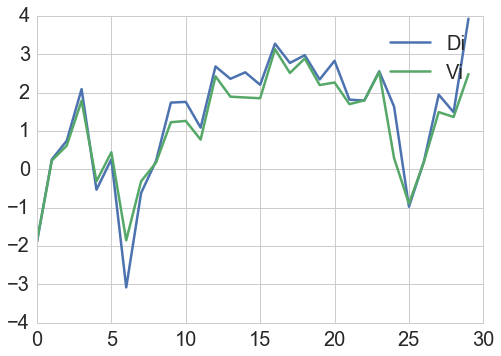

In [214]:
## transect 1
plt.plot(trans_surf_1['Di'],label = 'Di')
plt.plot(trans_surf_1['Vi'],label = 'Vi')
plt.legend()

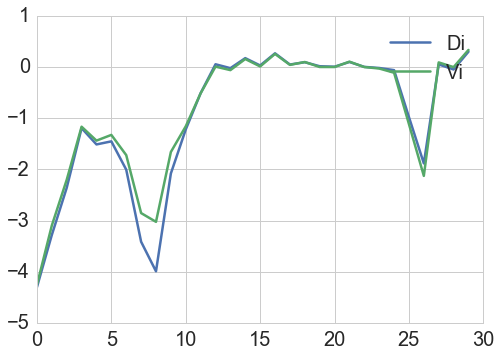

In [215]:
## transect 2
plt.plot(trans_surf_2['Di'],label = 'Di')
plt.plot(trans_surf_2['Vi'],label = 'Vi')
plt.legend()

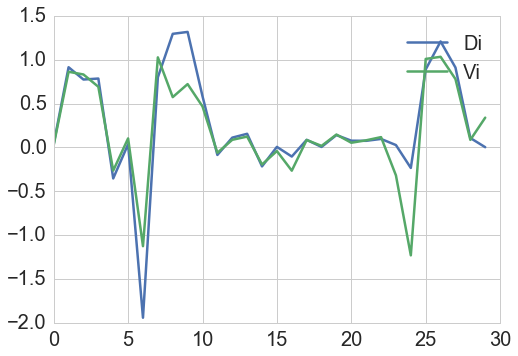

In [216]:
## transect 3
plt.plot(trans_surf_3['Di'],label = 'Di')
plt.plot(trans_surf_3['Vi'],label = 'Vi')
plt.legend()

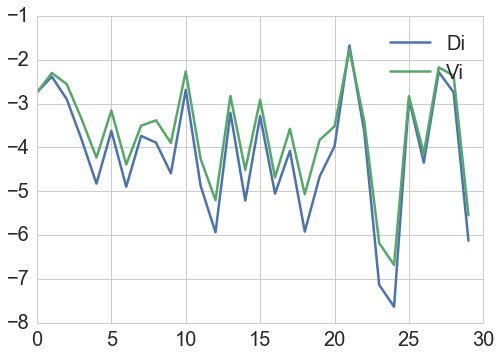

In [217]:
## transect 4
plt.plot(trans_surf_4['Di'],label = 'Di')
plt.plot(trans_surf_4['Vi'],label = 'Vi')
plt.legend()

In [218]:
for key in ['Vi','Di']:
    print(key,np.sum(trans_surf_1[key]))
    print(key,np.sum(trans_surf_2[key]))
    print(key,np.sum(trans_surf_3[key]))
    print(key,np.sum(trans_surf_4[key]))

('Vi', 34.181817336470786)
('Vi', -26.763239115328858)
('Vi', 5.765318650324665)
('Vi', -111.26896297379851)
('Di', 40.404551439544377)
('Di', -29.190873180984322)
('Di', 7.5126629340379374)
('Di', -124.78956026827927)


In [219]:
34.181817336470786-26.763239115328858+5.765318650324665-111.26896297379851

-98.08506610233192

In [220]:
40.404551439544377-29.190873180984322+7.5126629340379374-124.78956026827927

-106.06321907568127

# Vertical profiles

(48.5, 49.4)

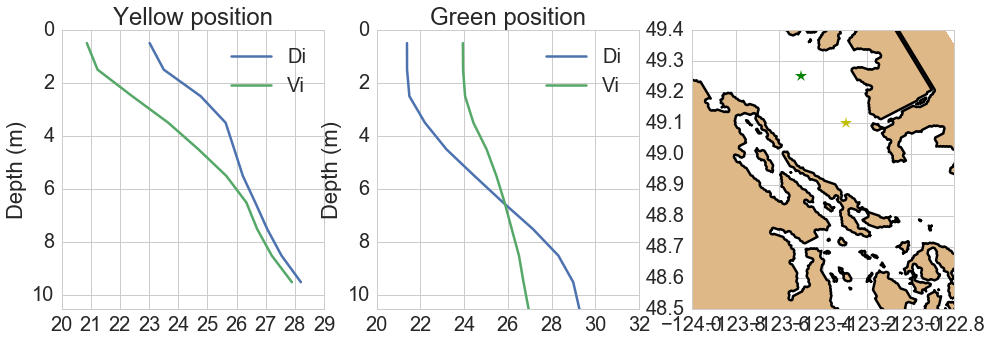

In [44]:
fig, axs = plt.subplots(1,3,figsize = (16,5))
ax = axs[0]
for key in ['Di','Vi']:
    ax.plot(S[key][-1,0:10,426,293],depth[0:10],label = key)
    ax.legend(loc = 'best')
    ax.set_title('Yellow position')
ax = axs[1]
for key in ['Di','Vi']:
    ax.plot(S[key][-1,0:30,470,282],depth[0:30],label = key)
    ax.legend(loc = 'best')
    ax.set_title('Green position')
for ax in [axs[0],axs[1]]:
    ax.set_ylim([depth[10],0])
    ax.set_ylabel('Depth (m)')
ax = axs[2]
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[426,293],Y[426,293],'y*',markersize = 12)
ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.4]) 

In [31]:
BATHY,X,Y = tidetools.get_SS2_bathy_data()
geo_tools.find_closest_model_point(-123.372667,49.054667,X,Y,land_mask=BATHY.mask)

(423, 276)

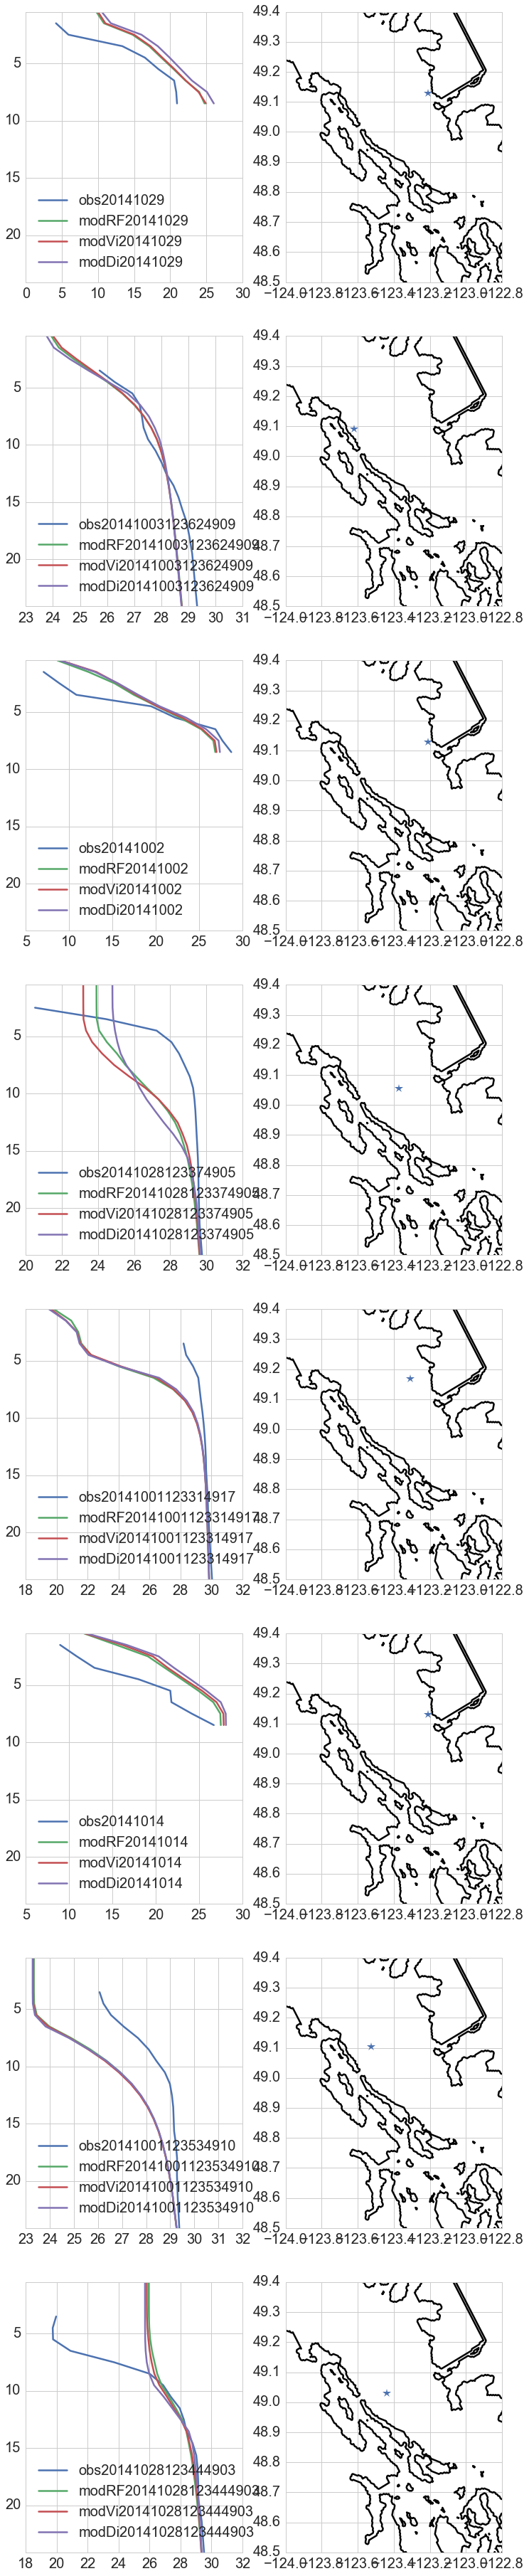

In [32]:
fig, axs = plt.subplots(8,2,figsize = (12,64))
for i,num in zip(obs_values.keys(),np.arange(8)):
    ax = axs[num,0]
    ax.plot(obs_values[i],dep,label = 'obs'+str(i))
    ax.plot(mod_values[i],dep,label = 'modRF'+str(i))
    ax.plot(mod_values_vi[i],dep,label = 'modVi'+str(i))
    ax.plot(mod_values_di[i],dep,label = 'modDi'+str(i))
    ax.set_ylim([dep[20],dep[0]])
    ax.legend(loc = 'best')
    
    ax = axs[num,1]
    if i == 20141002 or i ==20141014 or i ==20141029:
        ax.plot(-123.2119,49.1292,'*',markersize = 12)
    else:
        ax.plot(data_m[data_m['ID'] == str(i)].Longitude.values, \
           data_m[data_m['ID'] == str(i)].Latitude.values,'*',markersize = 12)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4])   

* Lower diffusivity case does not make surface salinity fresher, why?? Intermediate fresher in one of it.

/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume1_T.nc
Too fresh at depth 3.50003051758, -123.527, 49.1026666667, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume2_T.nc
Too fresh at depth 3.50003051758, -123.310333333, 49.1673333333, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume6_T.nc
Salinity within 1 at depth 3.50003051758, -123.62, 49.0896666667, 2014-10-03 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume11_T.nc
Too salty at depth 3.50003051758, -123.4385, 49.03, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume12_T.nc
Too salty at depth 2.50001144409, -123.372666667, 49.0546666667, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc
Salinity within 1 at depth 1.50000309944, -123.2119, 49.1292, 2014-10-02 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.1292, 2014-10-14 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc
Too salty at depth 1.50000309944

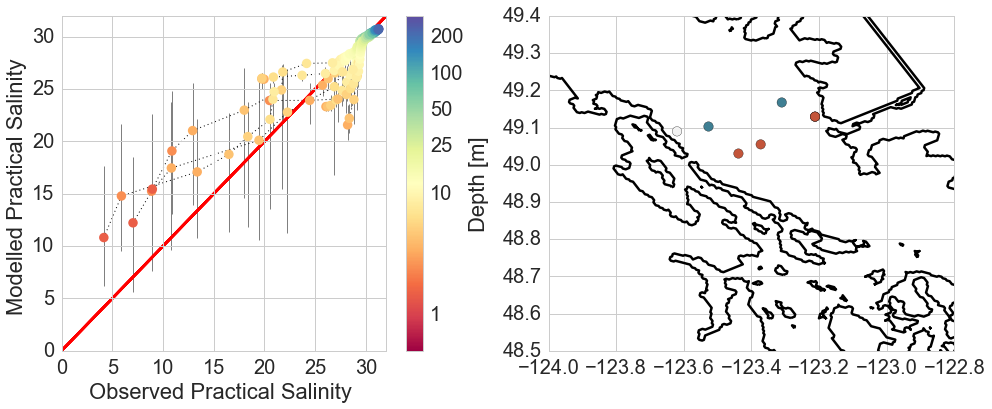

In [31]:
month = 10
lon_min=-123.622
lon_max=-123.2
lat_min=49.
lat_max=49.19
fig1,ax1 = compare_region(data_fall, month,lon_min, lon_max, lat_min, lat_max, paths['RFdaily'],'')

/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume1_T.nc
Too fresh at depth 3.50003051758, -123.527, 49.1026666667, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume2_T.nc
Too fresh at depth 3.50003051758, -123.310333333, 49.1673333333, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume6_T.nc
Salinity within 1 at depth 3.50003051758, -123.62, 49.0896666667, 2014-10-03 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume11_T.nc
Too salty at depth 3.50003051758, -123.4385, 49.03, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume12_T.nc
Salinity within 1 at depth 2.50001144409, -123.372666667, 49.0546666667, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc
Salinity within 1 at depth 1.50000309944, -123.2119, 49.1292, 2014-10-02 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.1292, 2014-10-14 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.

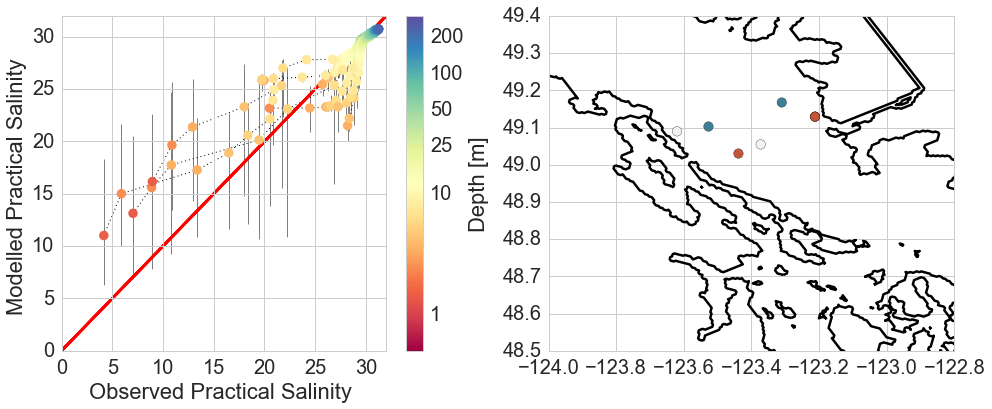

In [32]:
fig1,ax1 = compare_region(data_fall, month,lon_min, lon_max, lat_min, lat_max, paths['1e-05'],'')

/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume1_T.nc
Too fresh at depth 3.50003051758, -123.527, 49.1026666667, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume2_T.nc
Too fresh at depth 3.50003051758, -123.310333333, 49.1673333333, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume6_T.nc
Salinity within 1 at depth 3.50003051758, -123.62, 49.0896666667, 2014-10-03 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume11_T.nc
Too salty at depth 3.50003051758, -123.4385, 49.03, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume12_T.nc
Too salty at depth 2.50001144409, -123.372666667, 49.0546666667, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc
Salinity within 1 at depth 1.50000309944, -123.2119, 49.1292, 2014-10-02 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.1292, 2014-10-14 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc
Too salty at depth 1.500

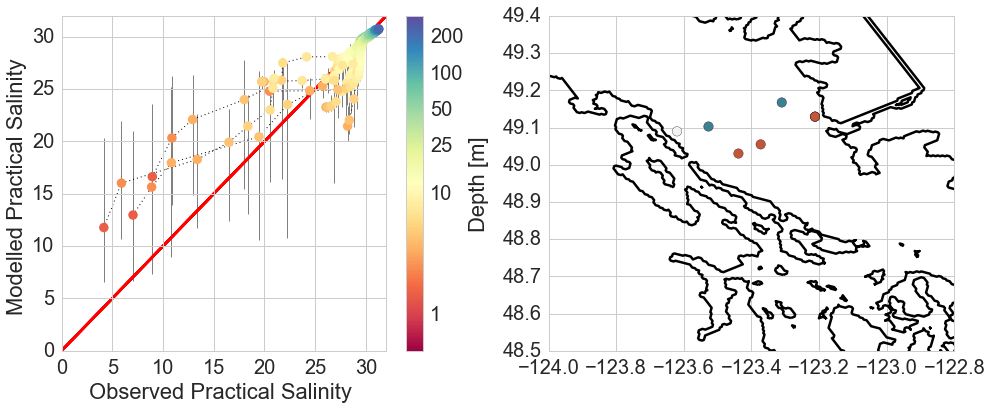

In [33]:
fig1,ax1 = compare_region(data_fall, month,lon_min, lon_max, lat_min, lat_max, paths['1e-051e-06'],'')